In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import timeit
from scipy.spatial import KDTree
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay




		 Convex Hull Algorithms 


Points: [(42, 12), (59, 60), (86, 8), (51, 22), (55, -7), (11, 95), (71, 87), (3, 13), (16, 73), (53, 65), (-2, 63), (85, 8), (45, 4), (54, 71), (51, -3), (18, 70), (8, 39), (75, 97), (86, 50), (4, 9), (8, 14), (-9, 5), (23, 52), (59, -4), (44, 62), (99, 99), (85, 44), (94, 10), (20, 14), (26, 77), (82, 60), (5, 87), (40, 69), (70, 45), (49, 1), (38, 12), (92, 68), (-9, 19), (39, 16), (25, 79), (43, 80), (-4, 32), (69, 16), (83, 14), (20, 16), (85, 84), (40, 96), (93, 96), (21, 82), (20, 50), (81, 34), (49, 15), (18, 27), (-10, 20), (36, 28), (67, 33), (26, 81), (47, 64), (56, 15), (-9, 79), (19, -3), (12, -8), (66, 20), (24, 56), (25, 30), (-4, 43), (76, 82), (63, 2), (73, 69), (45, 54), (57, -7), (27, 71), (65, 74), (51, 14), (88, 40), (40, 2), (82, -4), (84, 16), (24, 32), (80, 29)]
Length of point list: 80
Graham's Scan Convex Hull:  [(-10, 20), (-9, 79), (11, 95), (99, 99), (94, 10), (82, -4), (57, -7), (12, -8), (-10, 20)]
Vertices: 8
Time:  0.000246

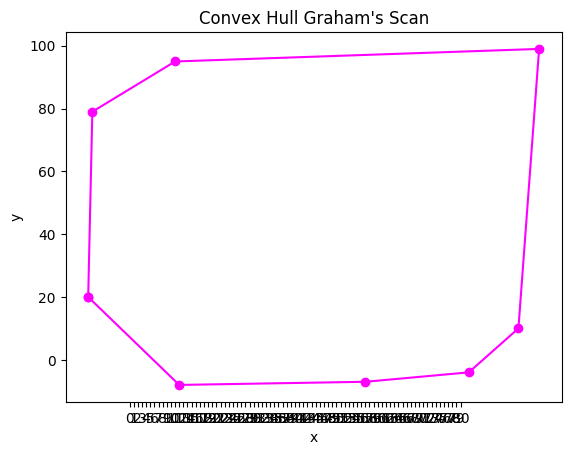

Jarvis March Convex Hull:  [(-10, 20), (-9, 79), (11, 95), (99, 99), (94, 10), (82, -4), (57, -7), (12, -8), (-9, 5), (-10, 20)]
Vertices: 9
Time:  0.000539200147613883


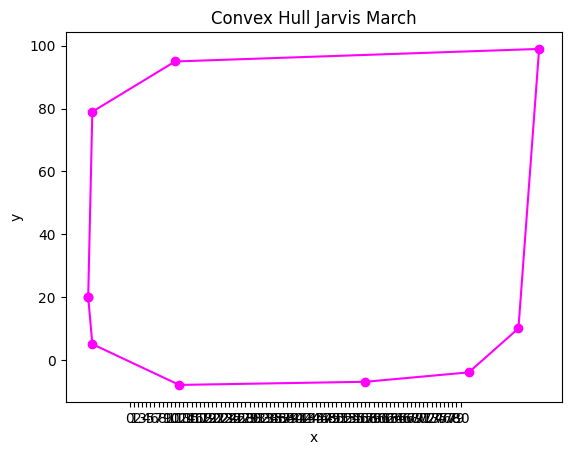

Divide and Conquer Convex Hull:  [(-10, 20), (-2, 63), (11, 95), (99, 99), (86, 8), (82, -4), (12, -8), (-10, 20)]
Vertices: 7
Time:  0.00063699996098876


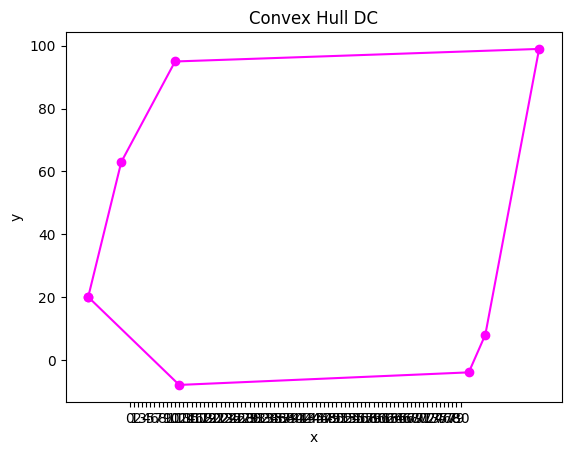

QuickHull Convex Hull:  [(-9, 79), (11, 95), (-10, 20), (99, 99), (57, -7), (12, -8), (82, -4), (-9, 5), (94, 10)]
Vertices:  9
Time:  0.014106400078162551


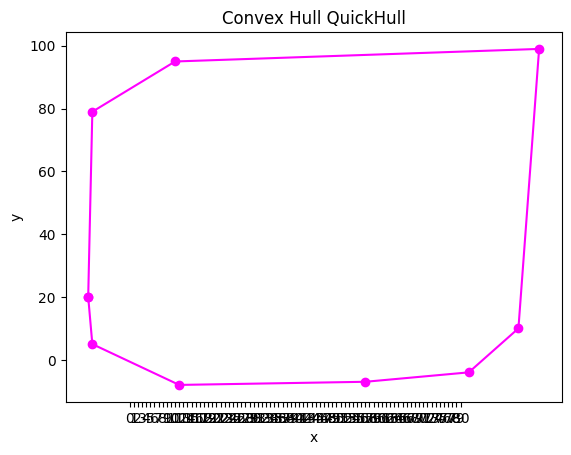



Visualizing STEPS of Convex Hull calculation algorithm JARVIS MARCH





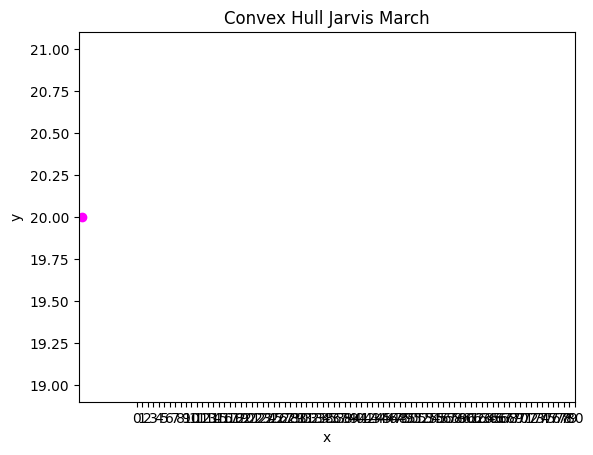

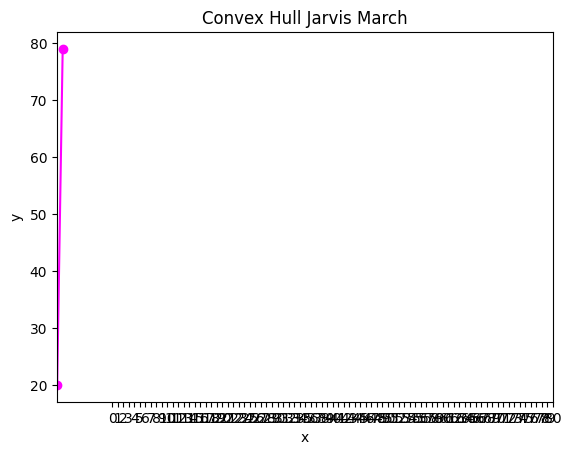

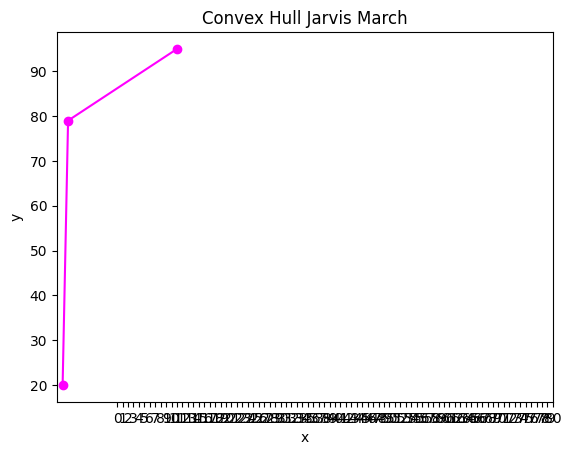

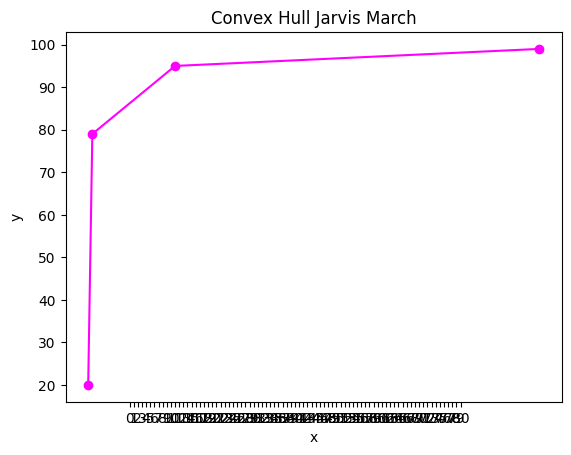

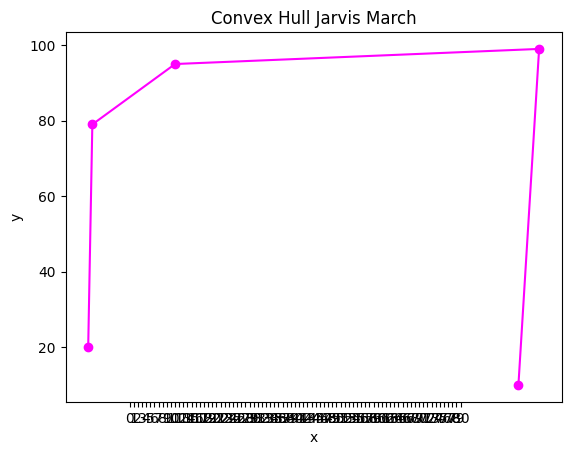

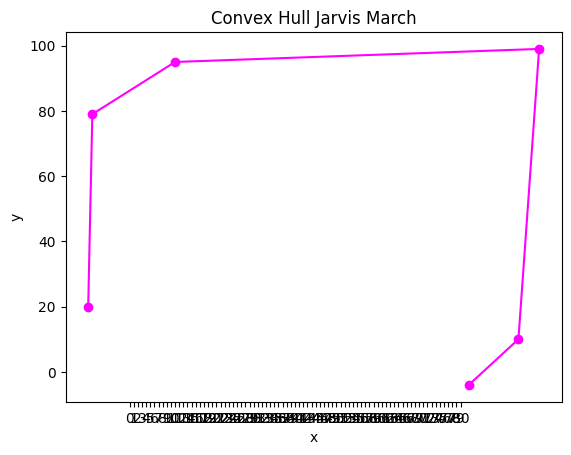

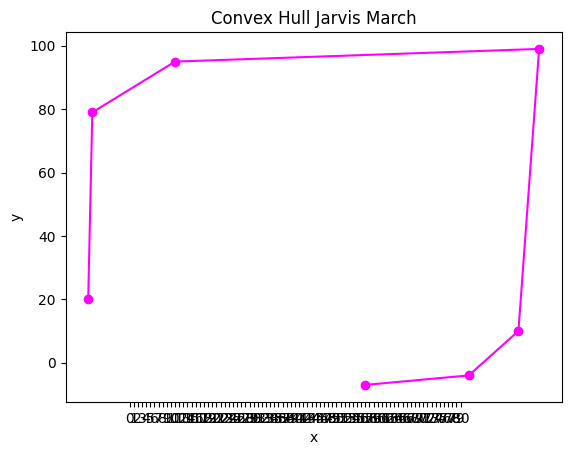

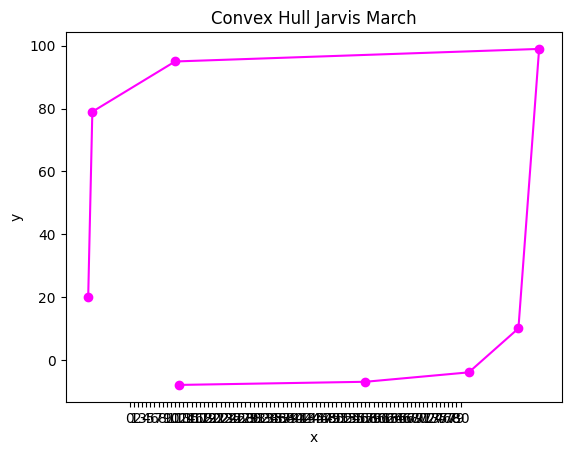

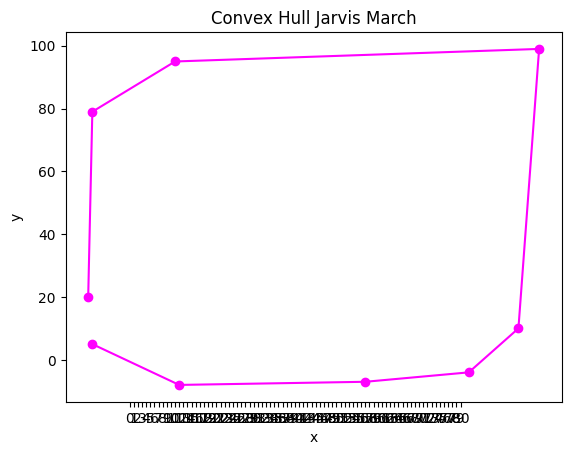

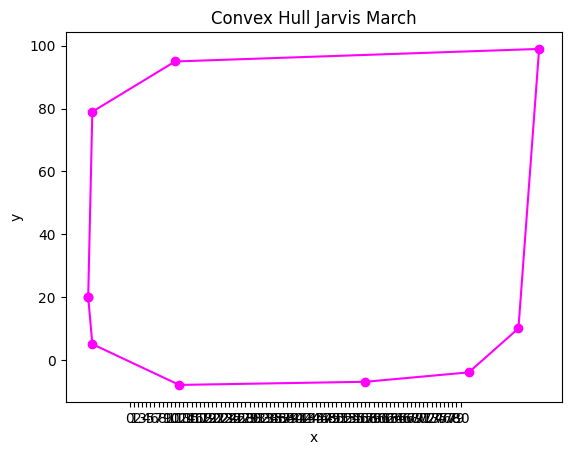

Jarvis March Convex Hull:  [(-10, 20), (-9, 79), (11, 95), (99, 99), (94, 10), (82, -4), (57, -7), (12, -8), (-9, 5), (-10, 20)]
Vertices:  9

	 Convex Hull in R3



Point list in R3: [(91, 48, 85), (80, 67, 81), (85, 63, 79), (14, 20, 65), (28, 93, 62), (-9, 1, -10), (75, 35, 7), (85, 6, -3), (61, 36, 69), (17, 80, 78), (92, 11, 25), (97, 29, 95), (39, 61, 58), (82, 28, 71), (99, 89, 4), (80, 65, 84), (76, 53, 53), (95, -3, 5), (78, 64, 21), (-10, 3, 69), (52, 14, 93), (43, 44, 8), (65, 4, 19), (10, 62, 94), (82, 8, 66), (2, 27, 51), (9, 93, 9), (28, 2, 58), (76, 2, 34), (62, 8, 60), (0, 92, 91), (65, 0, 80), (35, 78, 20), (14, -10, 32), (3, 30, 55), (86, 92, 84), (85, 45, -1), (27, -2, 91), (79, 0, 15), (31, 46, 66), (-3, 16, 51), (76, 19, 10), (99, 76, 44), (6, 52, 47), (56, 80, 17), (29, 98, 23), (96, 50, 41), (89, -3, 16), (52, 78, 37), (19, 50, 75)]
Vertices: 50
Graham's Scan Convex Hull R3:  [(-10, 3, 69), (14, -10, 32), (17, 80, 78), (27, -2, 91), (28, 2, 58), (29, 98, 23), (31

In [48]:

# PART 1

# NOTE: 
# The following program calculates convex hull of a randomly generated set (list) of elements of R^2 (and R^3).
# Every algorithm is defined as a function for organization purposes. 



# Functions
        
# Defining orientation predicate function in R2
# Note: pi[0] = xi, pi[1] = yi, where i = 0,1,2
def orientation2(p0 = [0,0], p1 = [0,0], p2 = [0,0]):
    return (p1[0] - p0[0]) * (p2[1] - p0[1]) - (p2[0] - p0[0]) * (p1[1] - p0[1])
    

# Defining orientation predicate function in R3 using numpy library
def orientation3(p0=[0,0,0],p1=[0,0,0],p2=[0,0,0],p3=[0,0,0]):
    a = np.array([[1,p0[0],p0[1],p0[2]], [1,p1[0],p1[1],p1[2]], [1,p2[0],p2[1],p2[2]], [1,p3[0],p3[1],p3[2]]])
    return np.linalg.det(a)


# Defining function that calculates squared distance between two elements of R2
# Note: pi[0] = xi, pi[1] = yi, where i = 0,1
def SqDist(p0=[0,0],p1=[0,0]):
    return (p0[0] - p1[0]) * (p0[0] - p1[0]) + (p0[1] - p1[1]) * (p0[1] - p1[1])



# Defining function that compares two elements of R2 using the orientation predicate 
# Note: it covers collinear case 
def cmp(p0=[0,0],p1=[0,0],p2=[0,0]):
    det = orientation2(p0,p1,p2)
    if det == 0:        # Collinear case
        if SqDist(p0,p2) >= SqDist(p0,p1):
            return -1
        else:
            return 1
    elif det < 0:
        return -1
    else: 
        return 1
    
    
# Defining a function that calculates which side of line (ab) p belongs in 
# Note: It's almost like calculating the orientation predicate determinant,
# but we also return a value based on turn of a,b,p
# Convention: result > 0 means that p is on the left of (ab), so ccw
#             result < 0 means that p is on the right of (ab), so cw
#             result == 0 means that p is a point of (ab), so collinear
def findSide(a=[0,0],b=[0,0],p=[0,0]):
    a = np.array([[1,a[0],a[1]], [1,b[0],b[1]], [1,p[0],p[1]]])
    result = np.linalg.det(a)
    
    if result > 0:
        return 1
    elif result < 0:
        return -1
    else:
        return 0
    

# Defining a function that calculates distance of element p from line (ab)
def distLine(a=[0,0],b=[0,0],p=[0,0]):
    return abs((p[1] - a[1]) * (b[0] - a[0]) - (b[1] - a[1]) * (p[0] - a[0]))



     

# Implementation 
print("\n\t\t Convex Hull Algorithms \n\n")

    
    
    
    
# 1. Graham's Scan Algorithm (R2) 

def GrahamsScan2(P = []):

    n = len(P)      # Defining n = |P|
    LUpper = []     
    LLower = []
    
    # Organize elements in lexicographic order (sort() method by default does that in python)
    P.sort()        
        
    # Creating LUpper
    LUpper.append(P[0])     # Insert first and second element in LUpper 
    LUpper.append(P[1])     
    
    for i in range(2,n):
        LUpper.append(P[i])
        while len(LUpper) > 2 and orientation2(LUpper[-3],LUpper[-2],LUpper[-1]) >= 0:
            LUpper.pop(-2)               

            
    # Creating LLower
    LLower.append(P[n-1])       # Reminder: n is 1-based, so last two elements are P[n-2] and P[n-1]
    LLower.append(P[n-2])
    for i in range(n-3,0,-1):
        LLower.append(P[i])
        while len(LLower) > 2 and orientation2(LLower[-3],LLower[-2],LLower[-1]) >= 0:
            LLower.pop(-2)                         
    
                            
    LLower.remove(LLower[0])    # Remove first and last elements of LLower
    LLower.remove(LLower[-1])
    
    # Creating list of convex hull vertices L
    L = list(dict.fromkeys(LUpper + LLower))
    
    # Lastly, add the first convex hull vertex at the end of the list 
    L.append(L[0])
    return L
        
    
 
 
 
# 1b. Graham's Scan Algorithm in R2 with step-by-step visualization  

def GrahamsScan2Step(P = []):

    n = len(P)      
    LUpper = []     
    LLower = []
    
    # Organize elements in lexicographic order (sort() method by default does that in python)
    P.sort()        
        
    # Creating LUpper and inserting first and second element in it
    LUpper.append(P[0])      
    
    currentLength = len(LUpper)
    x = [LUpper[i][0] for i in range(currentLength)]
    y = [LUpper[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show() 

    LUpper.append(P[1])     
    
    currentLength = len(LUpper)
    x = [LUpper[i][0] for i in range(currentLength)]
    y = [LUpper[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show()    
    for i in range(2,n):
        LUpper.append(P[i])
        while len(LUpper) > 2 and orientation2(LUpper[-3],LUpper[-2],LUpper[-1]) >= 0:
            LUpper.pop(-2)               
            
        currentLength = len(LUpper)
        x = [LUpper[i][0] for i in range(currentLength)]
        y = [LUpper[i][1] for i in range(currentLength)]
            
        plt.plot(x,y,color = 'magenta', marker = 'o')
        plt.xticks(range(0, n + 1, 1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("Convex Hull Graham's Scan")
        plt.show()

            
    # Creating LLower
    LLower.append(P[n-1])       # Reminder: n is 1-based, so last two elements are P[n-2] and P[n-1]
    
    currentLength = len(LLower)
    x = [LLower[i][0] for i in range(currentLength)]
    y = [LLower[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show()    
    
    LLower.append(P[n-2])
    currentLength = len(LLower)
    x = [LLower[i][0] for i in range(currentLength)]
    y = [LLower[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show() 
    for i in range(n-3,1,-1):
        LLower.append(P[i])
        while len(LLower) > 2 and orientation2(LLower[-3],LLower[-2],LLower[-1]) >= 0:
            LLower.pop(-2)                         
            currentLength = len(LLower)
        x = [LLower[i][0] for i in range(currentLength)]
        y = [LLower[i][1] for i in range(currentLength)]

        plt.plot(x,y,color = 'magenta', marker = 'o')
        plt.xticks(range(0, n + 1, 1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("Convex Hull Graham's Scan")
        plt.show() 
                            
    LLower.remove(LLower[0])    # Remove first and last elements of LLower
    LLower.remove(LLower[-1])
    
    # Creating list of convex hull vertices L
    L = LUpper + LLower
    
    # Lastly, add the first convex hull vertex at the end of the list 
    L.append(L[0])
    currentLength = len(L)
    x = [L[i][0] for i in range(currentLength)]
    y = [L[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show() 
    
    return L
          
    





# 1c. Graham's Scan Algorithm in R3 
def GrahamsScan3(P = []):

    n = len(P)      
    LUpper = []     
    LLower = []
    
    # Organize elements in lexicographic order 
    P.sort()        
        
    # Creating LUpper and inserting first and second element in it 
    LUpper.append(P[0])     
    LUpper.append(P[1])     
    
    for i in range(2,n):
        LUpper.append(P[i])
        
        # Calculating turn with orientation predicate in R3
        while len(LUpper) > 2 and orientation3(LUpper[-3],LUpper[-2],LUpper[-1]) >= 0:
            LUpper.pop(-2)               

            
    # Creating LLower
    LLower.append(P[n-1])       
    LLower.append(P[n-2])
    for i in range(n-3,0,-1):
        LLower.append(P[i])
        
        # Calculating turn with orientation predicate in R3
        while len(LLower) > 2 and orientation3(LLower[-3],LLower[-2],LLower[-1]) >= 0:
            LLower.pop(-2)                         
    
    
    # Remove first and last elements of LLower                            
    LLower.remove(LLower[0])    
    LLower.remove(LLower[-1])
    
    # Creating list of convex hull vertices L
    L = list(dict.fromkeys(LUpper + LLower))
    
    # Lastly, add the first convex hull vertex at the end of the list 
    L.append(L[0])
    return L
        
    
 
 

    
# 2a. Gift-wrapping (Jarvis March) Algorithm (R2)

def JarvisMarch(P = []):
    
    n = len(P)
    
    # Finding leftmost point P[r0] (r0 is index)
    r0 = 0        
    for i in range(1,n):
        if P[i][0] < P[r0][0]:
            r0 = i
        elif P[i][0] == P[r0][0]:
            if P[i][1] > P[r0][1]: 
                r0 = i
    
    # Defining its position as an extra variable           
    pos = P.index(P[r0])
    
    # Initializing list of convex hull vertices and elements p and q
    L = []            
    p = pos
    q = 0
    while(1):
        L.append(P[p])
        
        # Calculating q as the next, sequentially, element of P  
        q = (p + 1) % n
        
        # Iterating over every element of P except for r0, which is the leftmost point
        for i in range(n):       
            det = orientation2(P[p],P[i],P[q])
            
            # Calculating turn of r0,i,q, if they are collinear then choose the farthest element
            if det < 0 or (det == 0 and SqDist(P[i],P[p]) > SqDist(P[q],P[p])):
                q = i
        p = q
        if p == pos:
            break
    
    # Lastly, add the first convex hull vertex at the end of the list     
    L.append(L[0])  
    return L
   
   
   
   
   
   
# 2b. Gift-wrapping (Jarvis March) Algorithm in R2 with STEP-BY-STEP visualization

def JarvisMarchStep(P=[]):
    
    n = len(P)
    
    # Finding leftmost point P[r0] (r0 is index)
    r0 = 0        
    for i in range(1,n):
        if P[i][0] < P[r0][0]:
            r0 = i
        elif P[i][0] == P[r0][0]:
            if P[i][1] > P[r0][1]: 
                r0 = i
    
    # Defining its position as an extra variable           
    pos = P.index(P[r0])
    
    # Initializing list of convex hull vertices and elements p and q
    L = []            
    p = pos
    q = 0
    while(1):
        L.append(P[p])
        
        # Calculating q as the next, sequentially, element of P  
        q = (p + 1) % n
        
        # Iterating over every element of P except for r0, which is the leftmost point
        for i in range(n):       
            det = orientation2(P[p],P[i],P[q])
            
            # Calculating turn of r0,i,q, if they are collinear then choose the farthest element
            if det < 0 or (det == 0 and SqDist(P[i],P[p]) > SqDist(P[q],P[p])):
                q = i
        p = q
        
        # Plotting convex hull as it stands in current iteration
        currentLength = len(L)
        x = [L[i][0] for i in range(currentLength)]
        y = [L[i][1] for i in range(currentLength)]
            
        plt.plot(x,y,color = 'magenta', marker = 'o')
        plt.xticks(range(0, n + 1, 1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("Convex Hull Jarvis March")
        plt.show()     
        
        if p == pos:
            break
    
    # Lastly, add the first convex hull vertex at the end of the list 
    # So, we need to print the final step of the algorithm    
    L.append(L[0]) 
    
    currentLength = len(L)
    x = [L[i][0] for i in range(currentLength)]
    y = [L[i][1] for i in range(currentLength)]
        
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Jarvis March")
    plt.show() 
 
    return L
          
   


    
# Defining vertex list of convex hull found using the Divide and Conquer (DC) algorithm 
dcL = []   
     
     
# 3. Divide and Conquer Convex Hull algorithm in R2
def divideAndConquer(P=[]):
    
    n = len(P)
    
    # Sorting elements of P in lexicographic order
    P.sort()
    
    
    # Finding leftmost and rightmost points a and b 
    # and add them to the hull
    a = P[0]
    b = P[n-1]
    dcL.append(a)
    dcL.append(b)
    
    
    # Finding set of points to the left and right side 
    # of line (ab)
    
    # Convention: In case of collinearity, apply infinitesimal 
    # displacement method as follows: There's a 50% chance that 
    # elements y-coordinate will shift upward by 0.2 and 50% 
    # chance that it will shift downward by 0.2. Thus, the former
    # element belongs in leftSet and latter in rightSet
    leftSet = []
    rightSet = []
    # displacementConstant = 0.2
    for i in range(1,n-1):
        turn = orientation2(a,b,P[i])
        
        if turn > 0:        # Counter-clockwise, so left side of (ab)
            leftSet.append(P[i])
        elif turn < 0:      # Clockwise, so right side of (ab)
            rightSet.append(P[i])
        else:               # Collinear, must apply convenvtion
            continue

    
    findHullDC(rightSet,a,b,-1)
    findHullDC(leftSet,a,b,1)
    
    
    
    
     
# Function that recursively calculates every side (tuple of vertices) of convex hull.
# On every recursion, it calculates distance of every element on appropriate side of 
# line (ab). If found, element with max distance is added to convex hull and removed 
# from point list P.
# Reminder: turn > 0 => side = 1
#           turn < 0 => side = -1
#           turn = 0 => side = 0
def findHullDC(P = [], a = [0,0], b = [0,0], side = 0):
    
    n = len(P)
    if n == 0:
        return
    
    
    # Calculating farthest point from line (ab) by using its index in list of points P.
    maxDistance = 0
    index = -1
    
    for i in range(1,n-1):
        dist = distLine(a,b,P[i])
        if dist > maxDistance and findSide(a,b,P[i]) == side:
            index = i
            maxDistance = dist
    
    # Farthest point is c with distance <maxDistance>
    if index == -1:
        return

    c = P[index]
    
    # Add c to convex hull vertex list
    dcL.append(c)

    # Now that new convex hull vertex c has been found, calculate turn of 
    # points a,b and c in that order
    turn = orientation2(a,b,c)
        
    # According to the turn, recursively call the algorithm twice for every 
    # list of points to the left or right of line (ac) and to the right or 
    # left of line (cb) respectively.
    leftP = []
    rightP = []    
    if turn > 0:
        for i in range(n):
            
            if orientation2(a,c,P[i]) > 0:
                leftP.append(P[i])
            
            if orientation2(c,b,P[i]) > 0:
                rightP.append(P[i])
         
                
        # Recursively call function to calculate farthest point from lines (ac) and (cb)
        findHullDC(leftP,a,c,1)
        findHullDC(rightP,c,b,1)
    
    elif turn < 0:
        for i in range(n):
            
            if orientation2(a,c,P[i]) < 0:
                leftP.append(P[i])
            
            if orientation2(c,b,P[i]) < 0:
                rightP.append(P[i])
         
                
        # Recursively call function to calculate farthest point from lines (ac) and (cb)
        findHullDC(leftP,a,c,-1)
        findHullDC(rightP,c,b,-1)        
    
    else: 
        return

        
    
    
    
    
    
# 4. Recursive QuickHull Algorithm in R2

# Here, we define Hull as a global list since 
# our algorithm is recursive and we don't want
# it to reset on every call
quickHullL = []

# Note: p1 is the start and p2 the end of line (p1p2) <line>.
# Also, <side> is an indication of the position of element P[i]
# in relation to line (p1p2)
def QuickHull(P=[], p1=[0,0], p2=[0,0], side = 0):
   
    n = len(P)
    index = -1
    maxDistance = 0
    
    # Searching for point of P with max distance from line (p1p2)
    # (also calculating its turn)
    for i in range(n): 
        dist = distLine(p1,p2,P[i])
        if dist > maxDistance and findSide(p1,p2,P[i]) == side:
            index = i
            maxDistance = dist
    
    # If no such point was found, add points p1 and p2 to hull
    if index == -1:
        if p1 not in quickHullL:    
            quickHullL.append(p1)   
        if p2 not in quickHullL:
            quickHullL.append(p2)
        return
    
    # Repeat algorithm for parts of convex hull separated by P[index]
    QuickHull(P, P[index], p1, -findSide(P[index], p1, p2))
    QuickHull(P, P[index], p2, -findSide(P[index], p2, p1))
    
    
# Defining function that prints vertices of convex hull calculated 
# by the QuickHull algorithm
def printHull(P=[]):
    
    n = len(P)
    
    # Finding points with min and max x coordinate
    xMin = 0
    xMax = 0
    for i in range(1,n):
        if P[i][0] < P[xMin][0]:
            xMin = i
        if P[i][0] > P[xMax][0]:
            xMax = i
            
    start = timeit.default_timer()
    
    # Recursively calculate convex hull on both sides
    # of line (P[xMin][0]P[xMax][0])
    QuickHull(P,P[xMin], P[xMax], 1)
    QuickHull(P,P[xMin], P[xMax], -1) 
    L2 = list(dict.fromkeys(quickHullL))
    
    stop = timeit.default_timer()
    
    # Printing elements of convex hull using Jarvis March algorithm 
    # Note: We only use the Jarvis March algorithm for plotting
    #       Every convex hull vertex has been calculated using our
    #       QuickHull algorithm. 
    L = JarvisMarch(L2)
    hullLength = len(L)

    print("QuickHull Convex Hull: ", L2)
    print("Vertices: ", hullLength - 1)
    print("Time: ", stop - start)
               
    x = [L[i][0] for i in range(hullLength)]
    y = [L[i][1] for i in range(hullLength)]
    
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, n + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull QuickHull")
    plt.show()



        
  
# Main function 
def main():
    maxElements = 80
    
    if maxElements < 3:
        print("Convex Hull is not possible! Enter a valid number of elements.")
        return
    
    points = [(random.randint(-10,100),random.randint(-10,100)) for i in range(maxElements)]     # Creating <maxElements> random points of R2   
    print("Points:", points)
    print("Length of point list:" , len(points))
            
            
            
    # Graham's Scan R2
    start = timeit.default_timer()
    L = GrahamsScan2(points)
    stop = timeit.default_timer()
    n = len(L)
    print("Graham's Scan Convex Hull: ", L)
    print("Vertices:", n - 1)
    print("Time: ", stop - start)
            
    x = [L[i][0] for i in range(n)]
    y = [L[i][1] for i in range(n)]
    
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, maxElements + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Graham's Scan")
    plt.show()
            
            
            
    # Jarvis March
    start = timeit.default_timer()
    L = JarvisMarch(points)
    stop = timeit.default_timer()
    n = len(L)
    print("Jarvis March Convex Hull: ", L)
    print("Vertices:", n - 1)
    print("Time: ", stop - start)
                        
    x = [L[i][0] for i in range(n)]
    y = [L[i][1] for i in range(n)]
            
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, maxElements + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull Jarvis March")
    plt.show()
            


    # Divide and Conquer
    start = timeit.default_timer()
    divideAndConquer(points)
    dcL.append(dcL[0])
    stop = timeit.default_timer()
    
    L = JarvisMarch(dcL)
    n = len(L)
    
    print("Divide and Conquer Convex Hull: ", L)
    print("Vertices:", n - 1)
    print("Time: ", stop - start)
   
   
    x = [L[i][0] for i in range(n)]
    y = [L[i][1] for i in range(n)]
            
    plt.plot(x,y,color = 'magenta', marker = 'o')
    plt.xticks(range(0, maxElements + 1, 1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Convex Hull DC")
    plt.show() 
    
    
    
    # QuickHull 
    printHull(points)
    
    


    # Jarvis March step-by-step visual implementation
    print("\n\nVisualizing STEPS of Convex Hull calculation algorithm JARVIS MARCH\n\n\n")
    
    L = JarvisMarchStep(points)
    print("Jarvis March Convex Hull: ", L)
    print("Vertices: ", len(L) - 1)
    
    
    
    
    
    
    # Printing convex hull vertices in R3
    print("\n\t Convex Hull in R3\n\n\n")
    
    
    maxElementsR3 = 50
    pointsR3 = [(random.randint(-10,100),random.randint(-10,100),random.randint(-10,100)) for i in range(maxElementsR3)] 
    
    print("Point list in R3:", pointsR3)
    print("Vertices:", len(pointsR3))
    
    
    # Graham's Scan R3
    start = timeit.default_timer()
    L = GrahamsScan3(pointsR3)
    stop = timeit.default_timer()
    
    n = len(L)
    print("Graham's Scan Convex Hull R3: ", L)
    print("Vertices: ", n - 1)
    print("Time: ", stop - start)
    
    
    
    
         
    

    
if __name__ == "__main__":
    main()
    


Length of point list: 59
yes
Points: [(-9, 9), (-8, 22), (-6, 31), (-3, -7), (-3, 73), (-3, 75), (2, 10), (3, 68), (4, 43), (7, 29), (9, 10), (13, 27), (14, 77), (15, 32), (15, 37), (15, 90), (16, 83), (18, 20), (20, 22), (25, 45), (31, 7), (31, 85), (33, -5), (33, 70), (34, 56), (35, 23), (38, 47), (40, 47), (41, 97), (44, 99), (47, 68), (48, 0), (48, 47), (50, 57), (51, 34), (51, 39), (51, 58), (54, 25), (54, 63), (59, 63), (62, 1), (64, 0), (66, 21), (69, 49), (69, 53), (69, 57), (72, 41), (72, 97), (78, 43), (79, 29), (84, 93), (85, 72), (86, 75), (89, 27), (89, 57), (90, 57), (92, 66), (94, 16), (96, 29), (97, 77)]
Length of point list: 60


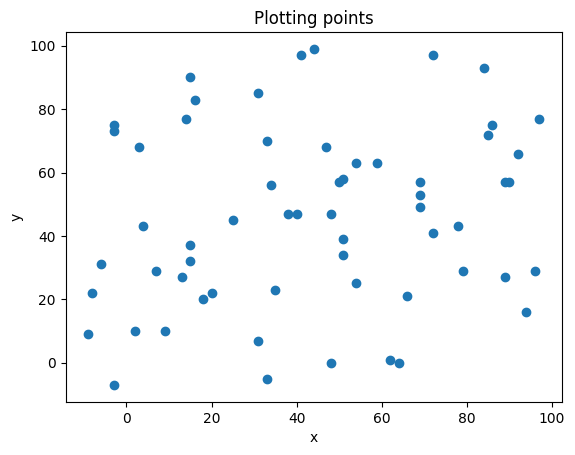

Random 2D range is: [28,37] x [51,89].
KD-Tree nodes: [(31, 85), (33, 70), (34, 56)]

Plotting KD-Tree and its nodes:



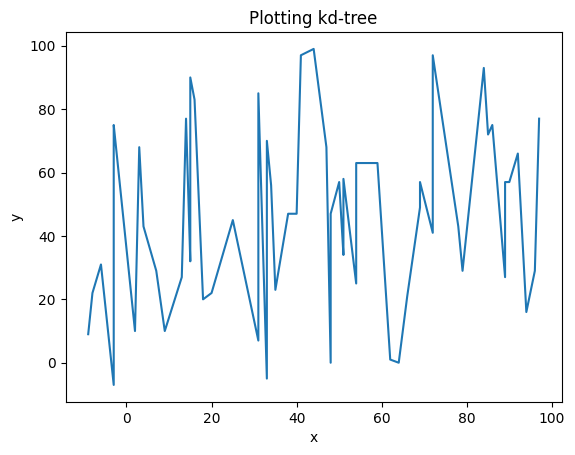

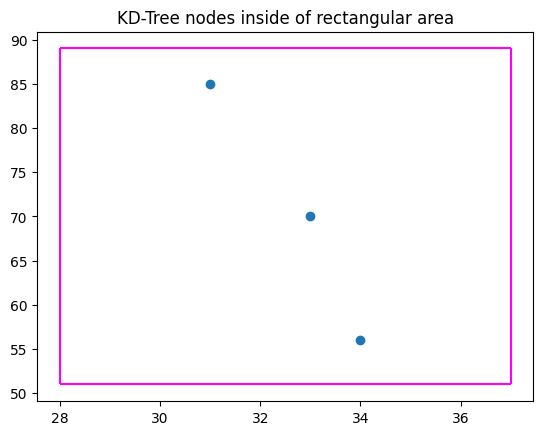


Plotting Voronoi diagram of given points:



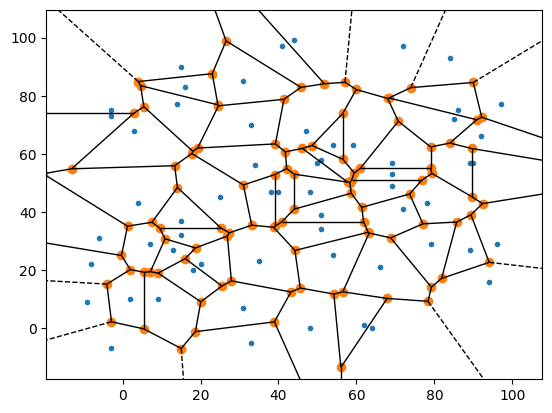

In [51]:

# PART 2
    
# NOTE: 
# The following program consists of functions that implement algorithms 
# for common computational geometry methods of orthogonal search, voronoi
# diagram and delaunay triangulation. We provide a randomly generated list 
# of R^2 elements as our input. 
    


# Defining function that receives a list of R2 points and an R2 range as input, 
# calculates the kd-tree of said points and returns a sorted list of kd-tree nodes
# that belong in said range.
def kd_tree_nodes_in_range(P = [], x_min = 0, x_max = 0, y_min = 0, y_max = 0):
    
    # First, we sort elements of R2.
    P.sort()
    
    # Then, we start calculating KD-Tree.
    kd_tree = KDTree(np.array(P))
    
    # And take its nodes.
    kd_tree_nodes = kd_tree.data.astype(int)

    # Lastly, we return the list containing all
    # kd-tree nodes in user-given R2 range.
    nodeList = []
    
    for node in kd_tree_nodes:
        if node[0] >= x_min and node[0] <= x_max:
            if node[1] >= y_min and node[1] <= y_max:
                nodeList.append(tuple(node))

    return nodeList
    
    
    
# Defining function that plots both the kd-tree and the kd-tree nodes found
# in given R2 range.
def plot_kd_tree_nodes_in_range(P = [], x_min = 0, x_max = 0, y_min = 0, y_max = 0):
    
    # First, we sort elements of P.
    P.sort()
    
    
    # Calculating KD-Tree
    kd_tree = KDTree(np.array(P))
    
    kd_tree_nodes = kd_tree.data.astype(int)
    
    
    # Respectively, finding every kd-tree node inside of
    # given R2 range.
    nodeList = []
    
    for node in kd_tree_nodes:
        if node[0] >= x_min and node[0] <= x_max:
            if node[1] >= y_min and node[1] <= y_max:
                nodeList.append(tuple(node))
    
    
    # Initially, we're plotting our kd-tree.
    n = len(kd_tree_nodes)
    x_values = [kd_tree_nodes[i][0] for i in range(n)]
    y_values = [kd_tree_nodes[i][1] for i in range(n)]
    
    plt.plot(x_values, y_values)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Plotting kd-tree")
    plt.show()    
    
  
    # Now, we're plotting the specified R2 rectangular area given as input,
    # inside of which we're also plotting the kd-tree nodes found. 
    plt.vlines(x = x_min, ymin = y_min, ymax = y_max, color = 'magenta')
    plt.vlines(x = x_max, ymin = y_min, ymax = y_max, color = 'magenta')

    plt.hlines(y = y_min, xmin = x_min, xmax = x_max, color = 'magenta')
    plt.hlines(y = y_max, xmin = x_min, xmax = x_max, color = 'magenta')

    plt.title("KD-Tree nodes inside of rectangular area")
    
    if len(nodeList) == 0:
        print("No KD-Tree nodes found to plot. Exiting.")
        return
    else:
        n = len(nodeList)
        x_values = [nodeList[i][0] for i in range(n)]
        y_values = [nodeList[i][1] for i in range(n)]

        plt.scatter(x_values, y_values)

        plt.show()
    
    
    
       
    
    
def main():
    
    maxElements = 60

    # Creating <maxElements> random points of R2.
    # NOTE: We initially create a set of said random points which we then convert to a list.
    # This was done in order to prevent at least two elements from having the exact same
    # coordinates (since sets don't allow duplicates).   
    points = list(set((random.randint(-10,100),random.randint(-10,100)) for i in range(maxElements)))
    print("Length of point list:" , len(points))
    
    # Because, sometimes, initial point list may include less than <maxElements> elements, we
    # created this loop to ensure that randomly created points will continuously be added to 
    # the list until we reach maximum size of <maxElements>. 
    while len(points) < maxElements:
        print("yes")
        newPoint = (random.randint(-10,100),random.randint(-10,100))
        if newPoint not in points:
            points.append(newPoint)
        else:
            continue
        
    points.sort()
    print("Points:", points)
    
    n = len(points)
    print("Length of point list:" , len(points))
    
    # We pass length of list <points> instead of <maxElements> variable because set might remove
    # some duplicates and NOT have <maxElements> elements in total.
    x = [points[i][0] for i in range(n)]
    y = [points[i][1] for i in range(n)]
            
            
    plt.scatter(x,y)


    # NOTE: If you want to print both the points and kd-tree in the same 
    # graph, comment out next 4 lines.
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Plotting points")
    plt.show()
    
    
    
    # Geometrical Search.


    # Define the rectangular range we're applying our geometrical search in.
    x_min = random.randint(-10,100)
    x_max = random.randint(x_min + 1,100)
    y_min = random.randint(-10,100)
    y_max = random.randint(y_min + 1,100)
    print("Random 2D range is: [" + str(x_min) + "," + str(x_max) + "] x [" + str(y_min) + "," + str(y_max) + "].")
    
    
    # Calculating and printing both the kd-tree and its nodes. 
    kd_tree_nodes = kd_tree_nodes_in_range(P = points, x_min = x_min, x_max = x_max, y_min = y_min, y_max = y_max)
    
    if len(kd_tree_nodes) == 0:
        print("No KD-Tree nodes found.")
    else: 
        print("KD-Tree nodes:", kd_tree_nodes)
        

    print("\nPlotting KD-Tree and its nodes:\n")
    plot_kd_tree_nodes_in_range(P = points, x_min = x_min, x_max = x_max, y_min = y_min, y_max = y_max)
    
    
    
    # Voronoi Diagram 
    
    # Using the Voronoi scipy method in order to plot respective 
    # Voronoi diagram, where we've highlighted its vertices with 
    # the orange color.
    print("\nPlotting Voronoi diagram of given points:\n")
    voronoiDiagram = Voronoi(points = points)
    voronoi_plot_2d(voronoiDiagram, point_size = 6)
    
    
    # Delaunay Triangulation 
    
    
    
    
    

if __name__ == "__main__":
    main()
    
